# U.S Medical Insurance Costs

In [33]:
#importing the required libraries
import csv
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# helper function to load data from csv file into a list
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

In [4]:
#Create empty lists for the various attributes in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [13]:
# look at the data in insurance_csv_dict
load_list_data(ages, r'C:\Users\amans\Downloads\insurance.csv', 'age')
load_list_data(sexes, r'C:\Users\amans\Downloads\insurance.csv', 'sex')
load_list_data(bmis, r'C:\Users\amans\Downloads\insurance.csv', 'bmi')
load_list_data(num_children, r'C:\Users\amans\Downloads\insurance.csv', 'children')
load_list_data(smoker_statuses, r'C:\Users\amans\Downloads\insurance.csv', 'smoker')
load_list_data(regions, r'C:\Users\amans\Downloads\insurance.csv', 'region')
load_list_data(insurance_charges, r'C:\Users\amans\Downloads\insurance.csv', 'charges')

# Print a summary of the loaded data (first 5 elements of each list)
print("Ages:", ages[:5])
print("Sexes:", sexes[:5])
print("BMIs:", bmis[:5])
print("Number of Children:", num_children[:5])
print("Smoker Statuses:", smoker_statuses[:5])
print("Regions:", regions[:5])
print("Insurance Charges:", insurance_charges[:5])

Ages: ['19', '18', '28', '33', '32']
Sexes: ['female', 'male', 'male', 'male', 'male']
BMIs: ['27.9', '33.77', '33', '22.705', '28.88']
Number of Children: ['0', '1', '3', '0', '0']
Smoker Statuses: ['yes', 'no', 'no', 'no', 'no']
Regions: ['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
Insurance Charges: ['16884.924', '1725.5523', '4449.462', '21984.47061', '3866.8552']


In [24]:
#class to perform analysis on patient data
class PatientsInfo:
    # init method that takes in each list parameter
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    # method that calculates the average ages of the patients in insurance.csv
    def analyze_ages(self):
        # initialize total age at zero
        total_age = 0
        # iterate through all ages in the ages list
        for age in self.patients_ages:
            # sum of the total age
            total_age += int(age)
        # return total age divided by the length of the patient list
        return ("Average Patient Age: " + str(round(total_age/len(self.patients_ages), 2)) + " years")

    # method that calculates the number of males and females in insurance.csv
    def analyze_sexes(self):
        # initialize number of males and females to zero
        females = 0
        males = 0
        # iterate through each sex in the sexes list
        for sex in self.patients_sexes:
            # if female add to female variable
            if sex == 'female':
                females += 1
            # if male add to male variable
            elif sex == 'male':
                males += 1
        # print out the number of each
        print("Count for female: ", females)
        print("Count for male: ", males)

    # method to find each unique region patients are from
    def unique_regions(self):
        # initialize empty list
        unique_regions = []
        # iterate through each region in regions list
        for region in self.patients_regions:
            # if the region is not already in the unique regions list
            # then add it to the unique regions list
            if region not in unique_regions: 
                unique_regions.append(region)
        # return unique regions list
        return unique_regions

    # method to find average yearly medical charges for patients in insurance.csv
    def average_charges(self):
        # initialize total_charges variable
        total_charges = 0
        # iterate through charges in patients charges list
        # add each charge to total_charge
        for charge in self.patients_charges:
            total_charges += float(charge)
        # return the average charges rounded to the hundredths place
        return ("Average Yearly Medical Insurance Charges: " +  
                str(round(total_charges/len(self.patients_charges), 2)) + " dollars.")
    
    # method to find BMI categories for patients
    def analyze_bmi_categories(self):
        bmi_categories = []
        for bmi in self.patients_bmis:
            bmi_value = float(bmi)
            if bmi_value < 18.5:
                category = 'Underweight'
            elif 18.5 <= bmi_value < 24.9:
                category = 'Normal Weight'
            elif 25 <= bmi_value < 29.9:
                category = 'Overweight'
            else:
                category = 'Obese'
            bmi_categories.append(category)
        return bmi_categories
    
    # method to calculate average charges
    def average_charges(self):
        total_charges = sum(float(charge) for charge in self.patients_charges)
        average_charges = total_charges / len(self.patients_charges)
        return f"Average Yearly Medical Insurance Charges: ${average_charges:.2f}"
    
    # method to create dictionary with all patients information
    def create_dictionary(self):
        self.patients_dictionary = {}
        self.patients_dictionary["age"] = [int(age) for age in self.patients_ages]
        self.patients_dictionary["sex"] = self.patients_sexes
        self.patients_dictionary["bmi"] = self.patients_bmis
        self.patients_dictionary["children"] = self.patients_num_children
        self.patients_dictionary["smoker"] = self.patients_smoker_statuses
        self.patients_dictionary["regions"] = self.patients_regions
        self.patients_dictionary["charges"] = self.patients_charges
        return self.patients_dictionary

In [25]:
#instance of class 'patient_info', to call each method 
patient_info = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)
patient_info.analyze_ages()

'Average Patient Age: 39.21 years'

In [26]:
patient_info.analyze_sexes()

Count for female:  1986
Count for male:  2028


In [27]:
patient_info.unique_regions()

['southwest', 'southeast', 'northwest', 'northeast']

In [28]:
patient_info.average_charges()

'Average Yearly Medical Insurance Charges: $13270.42'

In [30]:
patient_info.analyze_bmi_categories()
print("BMI Categories of first 5 patients:", patient_info.analyze_bmi_categories()[:5])

BMI Categories of first 5 patients: ['Overweight', 'Obese', 'Obese', 'Normal Weight', 'Overweight']


In [31]:
patient_info.average_charges()

'Average Yearly Medical Insurance Charges: $13270.42'

Text(0.5, 1.0, 'Distribution of Ages in the Insurance Data')

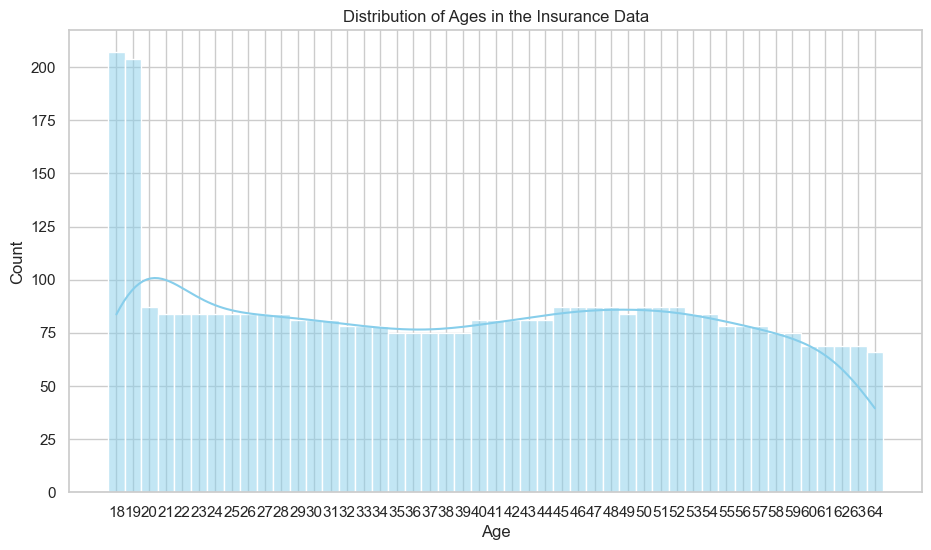

In [48]:
# visualizing a histogram of ages
ages.sort()
sns.set(style='whitegrid')
plt.figure(figsize=(11,6))
sns.histplot(ages,bins=10,kde=True,color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages in the Insurance Data')